In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [364]:
import statsmodels.api as sm
from pypfopt import CLA
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from scipy.stats import norm
from scipy.stats import norm,anderson
from scipy.stats import skewnorm, skewtest

### Uploading data containing daily stock prices of 4 major banks(Morgan Stanley, Citi, JPMorgan Chase, Goldman Sachs) during period before, during and after Financial Crisis of 2008

In [281]:
df1 = pd.read_csv("Financial_Stocks.csv")

In [282]:
df = df1.copy()

### Data Preprocessing

In [283]:
df.head(10)

,Date,Close_MS,Close_Citi,JPM_Close,GS_Close
0,03-01-2007,81.620003,552.500000,48.070000,200.720001
1,04-01-2007,81.910004,550.599976,48.189999,198.850006
2,05-01-2007,80.860001,547.700012,47.790001,199.050003
3,08-01-2007,81.349998,550.500000,47.950001,203.729996
4,09-01-2007,81.160004,545.700012,47.750000,204.080002
5,10-01-2007,81.570000,541.299988,48.099998,208.110001
6,11-01-2007,82.370003,541.700012,48.310001,211.880005
7,12-01-2007,82.860001,543.799988,47.990002,213.990005
8,16-01-2007,82.610001,547.700012,48.389999,213.589996
9,17-01-2007,82.379997,543.900024,48.430000,213.229996


In [284]:
df.isna().sum()

Date          0
Close_MS      0
Close_Citi    0
JPM_Close     0
GS_Close      0
dtype: int64

In [285]:
df['Date'] = pd.to_datetime(df['Date'])

In [286]:
df = df.set_index('Date')

In [287]:
df4 = df.copy()

In [288]:
df.head(3)

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003


In [289]:
df.describe()

,Close_MS,Close_Citi,JPM_Close,GS_Close
count,1007.000000,1007.000000,1007.000000,1007.000000
mean,40.228898,186.092056,40.848590,164.917607
std,20.498821,185.851510,6.746547,40.236383
min,9.200000,10.200000,15.900000,52.000000
25%,26.000000,39.099998,37.730002,144.930001
50%,30.790001,65.199997,41.529999,166.750000
75%,49.979999,292.550003,45.330000,190.285004
max,89.300003,552.500000,53.200001,247.919998


Text(0.5, 1.0, 'Close Price of 4 major price during financial crisis')

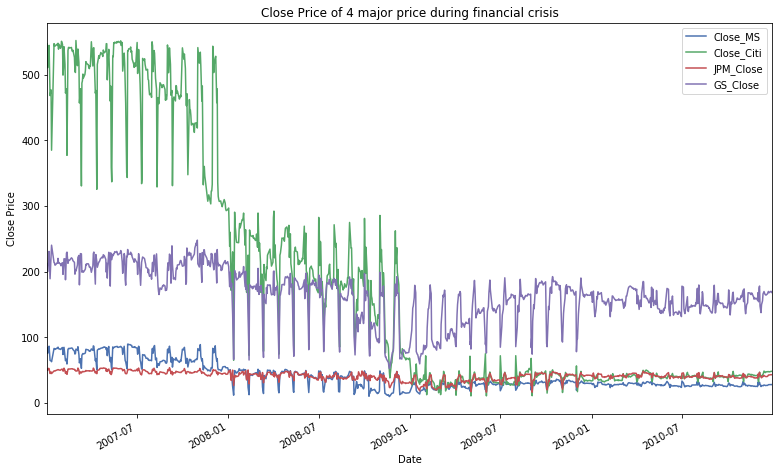

In [290]:
# from 2007 - 2010
df.plot(legend = 'MS',figsize=(13,8))
plt.ylabel("Close Price")
plt.title('Close Price of 4 major price during financial crisis')

### Quantifying Return (Taking log returns in place of close prices due to high autocorrelation in prices)

In [291]:
df['Lag_MS'] = df['Close_MS'].shift(1)
df['Return_MS'] = (np.log(df['Close_MS']/df['Lag_MS']))*100
df['Lag_Citi'] = df['Close_Citi'].shift(1)
df['Return_Citi'] = (np.log(df['Close_Citi']/df['Lag_Citi']))*100
df['Lag_JPM'] = df['JPM_Close'].shift(1)
df['Return_JPM'] = (np.log(df['JPM_Close']/df['Lag_JPM']))*100
df['Lag_GS'] = df['GS_Close'].shift(1)
df['Return_GS'] = (np.log(df['GS_Close']/df['Lag_GS']))*100

In [292]:
df.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close,Lag_MS,Return_MS,Lag_Citi,Return_Citi,Lag_JPM,Return_JPM,Lag_GS,Return_GS
Date,,,,,,,,,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-01,81.910004,550.599976,48.189999,198.850006,81.620003,0.354677,552.500000,-0.344488,48.070000,0.249323,200.720001,-0.936011
2007-05-01,80.860001,547.700012,47.790001,199.050003,81.910004,-1.290186,550.599976,-0.528084,48.189999,-0.833508,198.850006,0.100526
2007-08-01,81.349998,550.500000,47.950001,203.729996,80.860001,0.604153,547.700012,0.509924,47.790001,0.334239,199.050003,2.323950
2007-09-01,81.160004,545.700012,47.750000,204.080002,81.349998,-0.233824,550.500000,-0.875756,47.950001,-0.417976,203.729996,0.171652
2007-10-01,81.570000,541.299988,48.099998,208.110001,81.160004,0.503898,545.700012,-0.809576,47.750000,0.730307,204.080002,1.955471
2007-11-01,82.370003,541.700012,48.310001,211.880005,81.570000,0.975978,541.299988,0.073873,48.099998,0.435646,208.110001,1.795331
2007-12-01,82.860001,543.799988,47.990002,213.990005,82.370003,0.593112,541.700012,0.386915,48.310001,-0.664590,211.880005,0.990921
2007-01-16,82.610001,547.700012,48.389999,213.589996,82.860001,-0.302170,543.799988,0.714620,47.990002,0.830046,213.990005,-0.187104


In [293]:
df1 = df.drop(['Lag_Citi','Lag_MS','Lag_JPM','Lag_GS'],axis=1)

In [294]:
df1.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001,NaN,NaN,NaN,NaN
2007-04-01,81.910004,550.599976,48.189999,198.850006,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,80.860001,547.700012,47.790001,199.050003,-1.290186,-0.528084,-0.833508,0.100526
2007-08-01,81.349998,550.500000,47.950001,203.729996,0.604153,0.509924,0.334239,2.323950
2007-09-01,81.160004,545.700012,47.750000,204.080002,-0.233824,-0.875756,-0.417976,0.171652
2007-10-01,81.570000,541.299988,48.099998,208.110001,0.503898,-0.809576,0.730307,1.955471
2007-11-01,82.370003,541.700012,48.310001,211.880005,0.975978,0.073873,0.435646,1.795331
2007-12-01,82.860001,543.799988,47.990002,213.990005,0.593112,0.386915,-0.664590,0.990921
2007-01-16,82.610001,547.700012,48.389999,213.589996,-0.302170,0.714620,0.830046,-0.187104


In [295]:
df2 = df1.drop(['Close_MS','Close_Citi','GS_Close','JPM_Close'],axis=1)

In [296]:
df2.head(3)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,-1.290186,-0.528084,-0.833508,0.100526


In [297]:
df3 = df2.copy()

In [353]:
df3.head(10)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,-1.290186,-0.528084,-0.833508,0.100526
2007-08-01,0.604153,0.509924,0.334239,2.323950
2007-09-01,-0.233824,-0.875756,-0.417976,0.171652
2007-10-01,0.503898,-0.809576,0.730307,1.955471
2007-11-01,0.975978,0.073873,0.435646,1.795331
2007-12-01,0.593112,0.386915,-0.664590,0.990921
2007-01-16,-0.302170,0.714620,0.830046,-0.187104


In [299]:
df3.describe()

,Return_MS,Return_Citi,Return_JPM,Return_GS
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,-0.108756,-0.243700,-0.012875,-0.017902
std,5.008769,5.580447,3.865965,3.441285
min,-29.965820,-49.469624,-23.227805,-21.022262
25%,-1.735934,-1.991310,-1.498332,-1.418094
50%,-0.043817,-0.203060,-0.072195,-0.054054
75%,1.598136,1.576655,1.400192,1.556280
max,62.585004,45.631619,22.391712,23.481773


### Considering equal weightage to each asset in a portfolio

In [354]:
returns = df3.dropna(axis=0)

In [355]:
w = (0.25,0.25,0.25,0.25)

In [356]:
# Multilying weight vector with returns vector to calculate portfolio returns
portfolio_returns = returns.dot(w)

In [357]:
portfolio_returns.head(10)

Date
2007-04-01   -0.169125
2007-05-01   -0.637813
2007-08-01    0.943067
2007-09-01   -0.338976
2007-10-01    0.595025
2007-11-01    0.820207
2007-12-01    0.326589
2007-01-16    0.263848
2007-01-17   -0.265274
2007-01-18   -0.922285
dtype: float64

In [368]:
losses = -1*portfolio_returns

In [369]:
losses.head(10)

Date
2007-04-01    0.169125
2007-05-01    0.637813
2007-08-01   -0.943067
2007-09-01    0.338976
2007-10-01   -0.595025
2007-11-01   -0.820207
2007-12-01   -0.326589
2007-01-16   -0.263848
2007-01-17    0.265274
2007-01-18    0.922285
dtype: float64

In [304]:
# -ve returns are losses and +ve returns a are profit

In [305]:
type(portfolio_returns)

pandas.core.series.Series

### Pandas Series Object to Pandas Dataframe

In [306]:
portfolio_returns_new = pd.Series(portfolio_returns)
print (portfolio_returns_new)

Date
2007-03-01         NaN
2007-04-01   -0.169125
2007-05-01   -0.637813
2007-08-01    0.943067
2007-09-01   -0.338976
                ...   
2010-12-23   -0.600600
2010-12-27    1.245777
2010-12-28    0.058732
2010-12-29   -0.776881
2010-12-30   -0.082041
Length: 1007, dtype: float64


In [307]:
df = portfolio_returns_new.to_frame()

In [308]:
df = df.rename(columns={0: "returns"})

In [309]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.169125
2007-05-01,-0.637813
2007-08-01,0.943067
2007-09-01,-0.338976
2007-10-01,0.595025
2007-11-01,0.820207
2007-12-01,0.326589
2007-01-16,0.263848


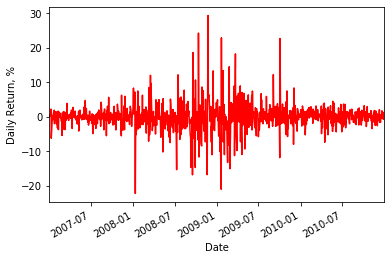

In [310]:
portfolio_returns.plot(color='red').set_ylabel("Daily Return, %")
plt.show()

Above graph shows very high volatility from July 2008 to July 2009 

In [311]:
# The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008
# There was an event during September that precipitated this decline. The 'spikiness' of portfolio returns indicates how 
# uncertain and volatile asset returns became.

In [312]:
portfolio_returns_percent = portfolio_returns*100

## VaR using Variance Covariance (Parametric Estimation)

In [313]:
covar = df3.cov()

#### Correlation in Percentage

In [314]:
print(covar)

             Return_MS  Return_Citi  Return_JPM  Return_GS
Return_MS    25.087771    16.949962   12.411611  13.923230
Return_Citi  16.949962    31.141387   15.314959  12.128333
Return_JPM   12.411611    15.314959   14.945687   9.666014
Return_GS    13.923230    12.128333    9.666014  11.842443


In [315]:
# Annualize the covariance using 252 trading days per year
covar_ann = covar*252

In [316]:
print(covar_ann)

               Return_MS  Return_Citi   Return_JPM    Return_GS
Return_MS    6322.118322  4271.390381  3127.726038  3508.654003
Return_Citi  4271.390381  7847.629460  3859.369779  3056.339857
Return_JPM   3127.726038  3859.369779  3766.313007  2435.835409
Return_GS    3508.654003  3056.339857  2435.835409  2984.295634


In [317]:
portfolio_variance = np.transpose(w)@covar_ann@w

In [318]:
portfolio_volatility = np.sqrt(portfolio_variance)

#### Portfolio Volatliltiy

In [319]:
print(portfolio_volatility)

61.96722286680826


In [320]:
# Portfolio has 61% volatilily

In [321]:
#The volatility of a portfolio of stocks is a measure of how wildly the total value of all the stocks in that portfolio
# appreciates or declines.

# Rolling Volatility

In [322]:
windowed = df.rolling(30)

In [323]:
volatility = windowed.std()*np.sqrt(252)

Text(0, 0.5, 'Annualized Volatility, 30-day Window')

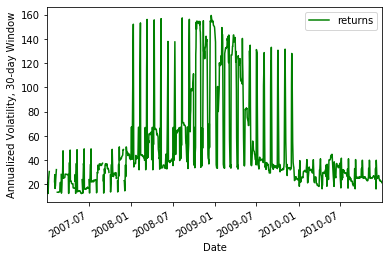

In [257]:
volatility.plot(color = 'green').set_ylabel("Annualized Volatility, 30-day Window")

In [258]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.169125
2007-05-01,-0.637813
2007-08-01,0.943067
2007-09-01,-0.338976
2007-10-01,0.595025
2007-11-01,0.820207
2007-12-01,0.326589
2007-01-16,0.263848


# Risk Factors

### Variables or events that drive portfolio return and volatility

Two types of risk factors are:
    1. Systematic Risk
    2. Idisyncratic Risk
    
#### Systematic Risk
Systematic risk is inherent to the market as a whole, reflecting the impact of economic, geo-political and financial factors.
This type of risk is distinguished from unsystematic risk, which impacts a specific industry or security.
Investors can somewhat mitigate the impact of systematic risk by building a diversified portfolio.
Ex: interest rate changes, inflation, recessions, and wars, among other major changes.
    
#### Idiosyncratic Risk
Idiosyncratic risk refers to the inherent factors that can negatively impact individual securities or a very specific group of assets.
The opposite of Idiosyncratic risk is a systematic risk, which refers to broader trends that impact the overall financial system or a very broad market.
Idiosyncratic risk can generally be mitigated in an investment portfolio through the use of diversification
Idiosyncratic risk is a type of investment risk that is endemic to an individual asset (like a particular company's stock),
or a group of assets (like a particular sector's stocks), or in some cases, a very specific asset class (like collateralized mortgage obligations). 

#### Idiosyncratic Risk vs. Systematic Risk
While idiosyncratic risk is, by definition, irregular and unpredictable, studying a company or industry can help an 
investor to identify and anticipate—in a general way—its idiosyncratic risks. Idiosyncratic risk is also highly individual, 
even unique in some cases. It can, therefore, be substantially mitigated or eliminated from a portfolio by using adequate 
diversification. Proper asset allocation, along with hedging strategies, can minimize its negative impact on an investment 
portfolio by diversification or hedging.
In contrast, systematic risk cannot be mitigated just by adding more assets to an investment portfolio. This market risk 
cannot be eliminated by adding stocks of various sectors to one's holdings. These broader types of risk reflect the 
macroeconomic factors that affect not just a single asset but other assets like it and greater markets and economies as well.

### Factor Models

Factor models assess on which risk factors asset returns or volatility are mostly dependent.
We can model theses factors using :
    1. Ordinary Least Square - Regression Model - 
       dependent variable - Asset returns/volatility
       independent variable - risk factors
    2. Fama French Model - combination of market risk and idiosyncratic risk (firm size and value)

Considering MBS(Mortgage Backed Security) 90 days mortgage Delinquency as a risk factor which caused the bankcruptcy of
Lehman Brothers. Risk factor delinquency rate was highly correlated with the returns.

Risk factor models often rely upon data that is of different frequencies. A typical example is when using quarterly
macroeconomic data, such as prices, unemployment rates.
here also delinquency rate is taken for 90 days (1 Q) so sampling returns for quarter

In [259]:
returns_avg = df.resample('Q').mean()

In [115]:
returns_avg.tail()

,returns
Date,
2009-12-31,-0.000281
2010-03-31,0.002696
2010-06-30,-0.001822
2010-09-30,0.000906
2010-12-31,-0.000570


In [116]:
# Now convert daily returns to weekly minimum returns
returns_min = df.resample('Q').min()
returns_min.head()

,returns
Date,
2007-03-31,-0.062338
2007-06-30,-0.041614
2007-09-30,-0.055136
2007-12-31,-0.055454
2008-03-31,-0.222164


In [117]:
delin = pd.read_csv("Delinq_rate.csv")

In [118]:
returns_avg.describe()

,returns
count,16.000000
mean,-0.000972
std,0.003676
min,-0.007180
25%,-0.002282
50%,-0.000641
75%,0.000821
max,0.005121


In [119]:
delin.describe()

,Delinq_Rate
count,16.000000
mean,0.073975
std,0.033431
min,0.023100
25%,0.042025
50%,0.082700
75%,0.103525
max,0.115400


Text(0, 0.5, 'Delinquency rate, decimal %')

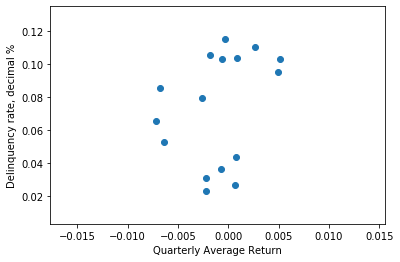

In [120]:
plt.scatter(returns_avg,delin['Delinq_Rate'])
plt.xlabel("Quarterly Average Return")
plt.ylabel("Delinquency rate, decimal %")

Text(0, 0.5, 'Delinquency rate, decimal %')

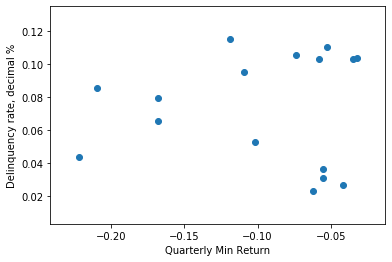

In [121]:
plt.scatter(returns_min,delin['Delinq_Rate'])
plt.xlabel("Quarterly Min Return")
plt.ylabel("Delinquency rate, decimal %")

In [122]:
# # Initial assessment indicates that there is little correlation between average returns and mortgage delinquencies, 
# but a stronger negative correlation exists between minimum returns and delinquency. In the following exercises we'll
# quantify this using least-squares regression.

In [123]:
delin.head()

,Date,Delinq_Rate
0,31-03-2007,0.0231
1,30-06-2007,0.0271
2,30-09-2007,0.0309
3,31-12-2007,0.0367
4,31-03-2008,0.0438


In [124]:
delin['Date'] = pd.to_datetime(delin['Date'])
delin = delin.set_index('Date')

In [125]:
delin.head()

,Delinq_Rate
Date,
2007-03-31,0.0231
2007-06-30,0.0271
2007-09-30,0.0309
2007-12-31,0.0367
2008-03-31,0.0438


In [127]:
# Crisis Factor Model (OLS) LEFT to study

In [64]:
regression = sm.OLS(returns_avg,delin['Delinq_Rate']).fit()

In [65]:
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.2271
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                       0.641
Time:                        12:06:03   Log-Likelihood:                          67.052
No. Observations:                  16   AIC:                                     -132.1
Df Residuals:                      15   BIC:                                     -131.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [66]:
regression_qmin = sm.OLS(returns_min,delin['Delinq_Rate']).fit()

In [67]:
print(regression_qmin.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.594
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              21.92
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    0.000295
Time:                        12:06:03   Log-Likelihood:                          19.097
No. Observations:                  16   AIC:                                     -36.19
Df Residuals:                      15   BIC:                                     -35.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [68]:
# Now convert daily returns to weekly minimum returns
returns_vol = df.resample('Q').std()
returns_vol.head()

,returns
Date,
2007-03-31,0.017870
2007-06-30,0.014345
2007-09-30,0.019091
2007-12-31,0.021575
2008-03-31,0.046946


In [69]:
regression_vol = sm.OLS(returns_vol,delin['Delinq_Rate']).fit()

In [70]:
print(regression_vol.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              28.68
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    8.01e-05
Time:                        12:06:08   Log-Likelihood:                          37.712
No. Observations:                  16   AIC:                                     -73.42
Df Residuals:                      15   BIC:                                     -72.65
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### As seen from the regressions, mortgage delinquencies are acting as a systematic risk factor for both minimum quarterly returns and average volatility of returns, but not for average quarterly returns. The R-squared goodness of fit isn't high in any case, but a model with more factors would likely generate greater explanatory power.

In [71]:
##R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the 
##independent variable(s) in a regression model.

# Modern Portfolio Theory

What maximum return an investor can expect as per given risk apetite calculated from the portfolio volatility 

#### Eficient Portfolio
portfolio with weights generating highest expected return for given level of risk

#### Efficient Frontier
Locus of (risk,return) pairs created by efficient portfolio

In [64]:
# pip install pyportfolioopt

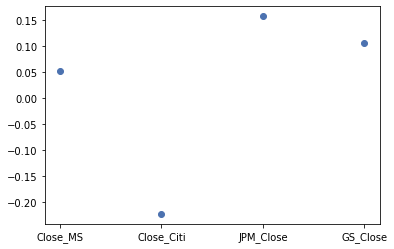

In [73]:

# Compute the annualized average historical return
mean_returns = mean_historical_return(df4, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

In [74]:
mean_returns.head()

Close_MS      0.051932
Close_Citi   -0.222364
JPM_Close     0.156725
GS_Close      0.104710
dtype: float64

In [75]:
# The average historical return is usually available as a proxy for expected returns, but is not always accurate--a more 
# thorough estimate of expected returns requires an assumption about the return distribution, which we'll discuss in the context
# of Loss Distributions later in the course.

In [76]:
df4.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003
2007-08-01,81.349998,550.500000,47.950001,203.729996
2007-09-01,81.160004,545.700012,47.750000,204.080002
2007-10-01,81.570000,541.299988,48.099998,208.110001
2007-11-01,82.370003,541.700012,48.310001,211.880005
2007-12-01,82.860001,543.799988,47.990002,213.990005
2007-01-16,82.610001,547.700012,48.389999,213.589996


In [77]:
# Import the CovarianceShrinkage object, it reduces/shrinks the errors/residuals while calculating the covariance matrix

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(df4)

In [78]:
# Difference in calculating covariance matrix through covariance shrinkage and through sample cov() method
# Compute the sample covariance matrix of returns
sample_cov = df4.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.717102    0.450956   0.319404  0.372737
Close_Citi  0.450956    0.796039   0.398215  0.320531
JPM_Close   0.319404    0.398215   0.384847  0.247412
GS_Close    0.372737    0.320531   0.247412  0.304432 

Efficient Covariance Matrix
             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.707324    0.425953   0.301695  0.352071
Close_Citi  0.425953    0.781884   0.376136  0.302760
JPM_Close   0.301695    0.376136   0.393490  0.233695
GS_Close    0.352071    0.302760   0.233695  0.317534 



In [79]:
# Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) 
# may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient 
# frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.

In [80]:
df4.head()

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003
2007-08-01,81.349998,550.500000,47.950001,203.729996
2007-09-01,81.160004,545.700012,47.750000,204.080002


In [81]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
    sub_price = df4.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)


Efficient Covariance Matrices
 {'during':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.994390    0.465336   0.298613  0.434874
Close_Citi  0.465336    0.713035   0.364848  0.323977
JPM_Close   0.298613    0.364848   0.422516  0.224668
GS_Close    0.434874    0.323977   0.224668  0.408773, 'after':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.388839    0.344939   0.279727  0.231624
Close_Citi  0.344939    0.841156   0.356788  0.252684
JPM_Close   0.279727    0.356788   0.382494  0.223740
GS_Close    0.231624    0.252684   0.223740  0.244539}


In [128]:
df3.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717


In [83]:
# Great! The breakdown of the 2007 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis
# , and this changed the risk-return trade-off after the crisis. For future reference, also note that although we used a loop
# in this exercise, a dictionary comprehension could also have been used to create the efficient covariance matrix.

In [85]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'during' : {'start': '1-1-2007', 'end': '31-12-2008'}}

# Compute the efficient covariance for each epoch
e_cov_during = {}
for x in epochs.keys():
    sub_price = df4.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov_during[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov_during)


Efficient Covariance Matrices
 {'during':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.994390    0.465336   0.298613  0.434874
Close_Citi  0.465336    0.713035   0.364848  0.323977
JPM_Close   0.298613    0.364848   0.422516  0.224668
GS_Close    0.434874    0.323977   0.224668  0.408773}


## Efficient Frontier Using CLA Algorithm

In [260]:
df4.head()

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003
2007-08-01,81.349998,550.500000,47.950001,203.729996
2007-09-01,81.160004,545.700012,47.750000,204.080002


In [261]:
df3.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,-1.290186,-0.528084,-0.833508,0.100526
2007-08-01,0.604153,0.509924,0.334239,2.323950
2007-09-01,-0.233824,-0.875756,-0.417976,0.171652


In [262]:
df6=df3.loc['2007-03-01':'2008-12-31']

In [263]:
df7=df4.loc['2007-03-01':'2008-12-31']

In [264]:
e_cov_during = np.array(CovarianceShrinkage(df7).ledoit_wolf())

In [265]:
type(e_cov_during)

numpy.ndarray

In [266]:
returns_during = np.array(df6.mean())

In [267]:
efficient_portfolio_during = CLA(returns_during, e_cov_during)

In [268]:
print(efficient_portfolio_during.min_volatility())

{0: 0.0, 1: 0.0, 2: 0.4814250629859924, 3: 0.5185749370140076}


In [269]:
# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

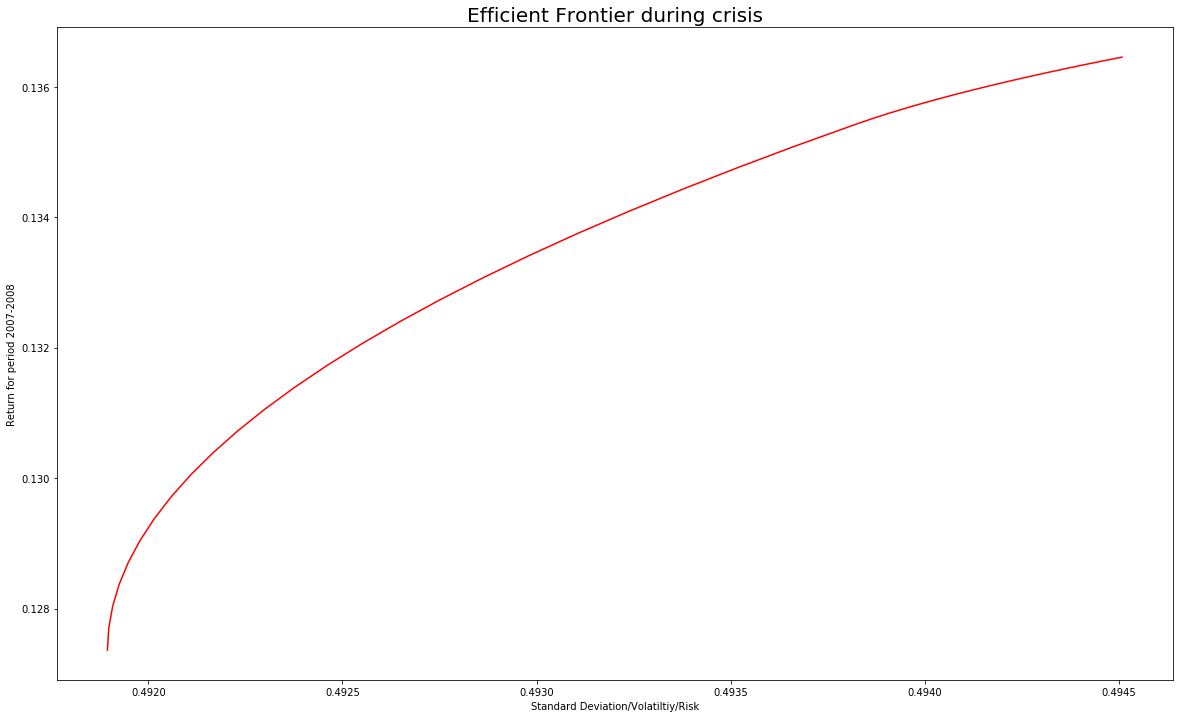

In [278]:
plt.figure(figsize=(20,12))
plt.xlabel('Standard Deviation/Volatiltiy/Risk')
plt.ylabel('Return for period 2007-2008')
plt.title('Efficient Frontier during crisis',size=20)
plt.plot(vol,ret,c='r')

In [271]:
df9=df4.loc['2009-01-01':'2010-12-31']  # for covariance matrix (prices)
df10=df3.loc['2009-01-01':'2010-12-31'] # returns

In [272]:
returns_after = np.array(df10.mean())
print(returns_after)

[ 0.1059442  -0.06826069  0.05808973  0.13645525]


In [273]:
e_cov_after = np.array(CovarianceShrinkage(df9).ledoit_wolf())
efficient_portfolio_after = CLA(returns_after, e_cov_after)
(ret, vol, weights) = efficient_portfolio_after.efficient_frontier()
# Add the frontier to the plot showing the 'before' and 'after' frontiers

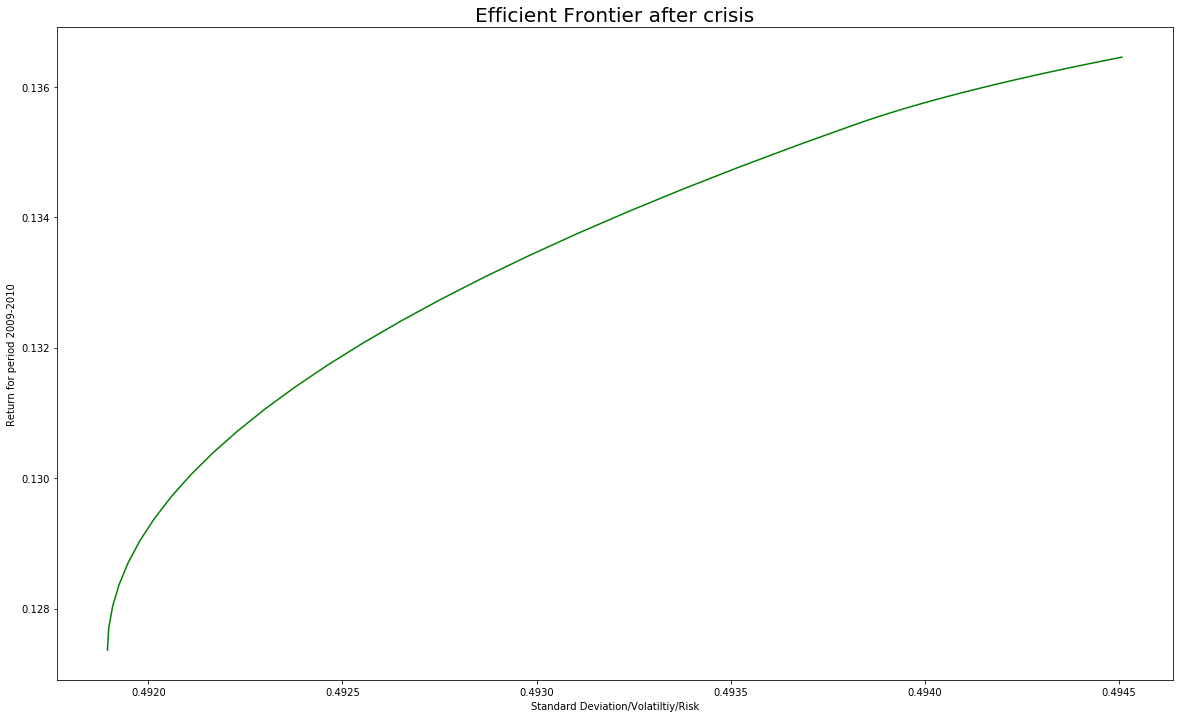

In [279]:
plt.figure(figsize=(20,12))
plt.xlabel('Standard Deviation/Volatiltiy/Risk')
plt.ylabel('Return for period 2009-2010')
plt.title('Efficient Frontier after crisis',size=20)
plt.plot(vol,ret,c='g')

In [118]:
## Risk reduced after crisis

# Portfolio Optimization

In [324]:
df_returns = df1[['Return_MS','Return_Citi','Return_JPM','Return_GS']]

In [325]:
df_returns.head(10)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,-1.290186,-0.528084,-0.833508,0.100526
2007-08-01,0.604153,0.509924,0.334239,2.323950
2007-09-01,-0.233824,-0.875756,-0.417976,0.171652
2007-10-01,0.503898,-0.809576,0.730307,1.955471
2007-11-01,0.975978,0.073873,0.435646,1.795331
2007-12-01,0.593112,0.386915,-0.664590,0.990921
2007-01-16,-0.302170,0.714620,0.830046,-0.187104


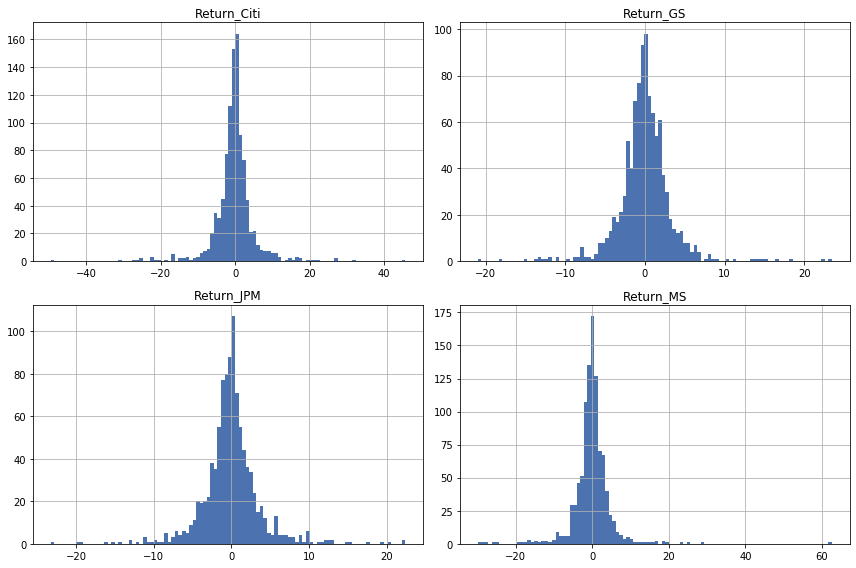

In [326]:
df_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [327]:
df_returns.mean()

Return_MS     -0.108756
Return_Citi   -0.243700
Return_JPM    -0.012875
Return_GS     -0.017902
dtype: float64

In [328]:
df_returns.cov()*252

,Return_MS,Return_Citi,Return_JPM,Return_GS
Return_MS,6322.118322,4271.390381,3127.726038,3508.654003
Return_Citi,4271.390381,7847.629460,3859.369779,3056.339857
Return_JPM,3127.726038,3859.369779,3766.313007,2435.835409
Return_GS,3508.654003,3056.339857,2435.835409,2984.295634


## Portfolio Optimization using Monte Carlo Simulation (Random Weights)

In [144]:
np.random.seed(101)
print(df1.columns)
rand_weights = np.array(np.random.rand(4))
print('Random Weights : ',rand_weights)
## To make sum of random weights equal to 1 , divide each random generated weight by sum
print('Rebalance')
weights = rand_weights/np.sum(rand_weights)
print(weights)

Index(['Close_MS', 'Close_Citi', 'JPM_Close', 'GS_Close', 'Return_MS',
       'Return_Citi', 'Return_JPM', 'Return_GS'],
      dtype='object')
Random Weights :  [0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [153]:
## Yearly portfolio expected return
exp_ret = np.sum(df_returns.mean()*weights*252)
exp_ret

-0.3889862858815879

In [154]:
## Portfolio Volatility Yearly
exp_vol = np.sqrt(np.dot(weights.T,np.dot(df_returns.cov()*252,weights)))
exp_vol

0.7083152895453855

In [156]:
## Sharpe Ratio
sr = exp_ret/exp_vol
print('Sharpe Ratio :',sr)

Sharpe Ratio : -0.549171098835448


In [158]:
## Final code for monte carlo
np.random.seed(101)
num_ports = 10000
all_weights = np.zeros((num_ports,len(df_returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    rand_weights = np.array(np.random.rand(4))
    ## To make sum of random weights equal to 1 , divide each random generated weight by sum
    weights = rand_weights/np.sum(rand_weights)
    all_weights[ind,:] = weights
    ## Yearly portfolio expected return
    ret_arr[ind] = np.sum(df_returns.mean()*weights*252)
    ## Portfolio Volatility Yearly
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(df_returns.cov()*252,weights)))
    ## Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [160]:
sharpe_arr.argmax()

7872

In [161]:
all_weights[7872,:]

array([0.01225268, 0.00812669, 0.74934034, 0.2302803 ])

In [163]:
max_sr_ret = ret_arr[7872]
max_sr_vol = vol_arr[7872]

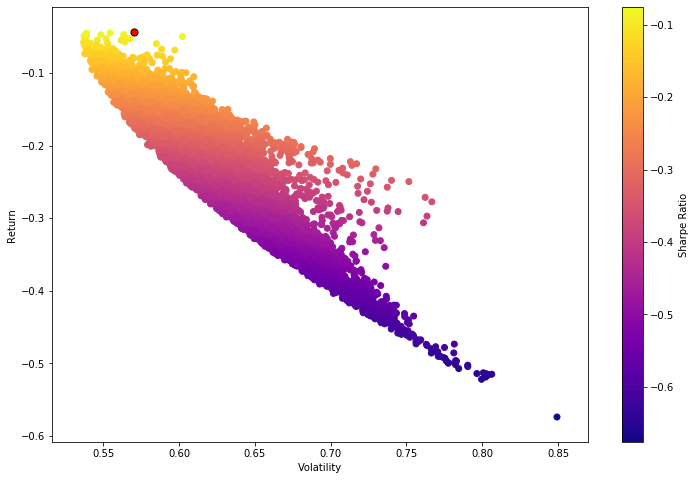

In [165]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Var(Value at Risk) of a Normal Distribution

95% VaR:  1.6448536269514722 ; 99% VaR:  2.306928893526917


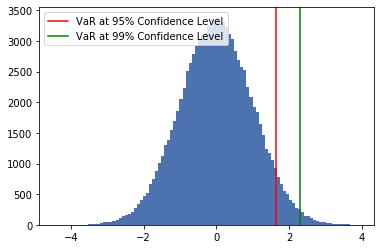

In [330]:
# Var of a Normal Distribution
# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR meaasure at the 5% significance level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

# Plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.axvline(x = VaR_99, c='g', label = "VaR at 99% Confidence Level")

plt.legend(); plt.show()

## CVAR of a Normal Distribution

In [405]:
losses.head(10)

Date
2007-04-01    0.169125
2007-05-01    0.637813
2007-08-01   -0.943067
2007-09-01    0.338976
2007-10-01   -0.595025
2007-11-01   -0.820207
2007-12-01   -0.326589
2007-01-16   -0.263848
2007-01-17    0.265274
2007-01-18    0.922285
dtype: float64

In [406]:
mean_loss = losses.mean()

In [407]:
mean_loss

0.09580838926126413

In [408]:
std_loss = losses.std()

In [409]:
std_loss

3.903568122449752

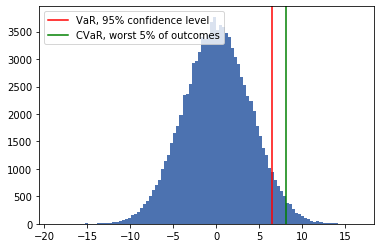

In [410]:
# Compute the mean and variance of the portfolio losses
pm = mean_loss
ps = std_loss

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

## VaR of Student's t-distribution

In [411]:
from scipy.stats import t

In [413]:
mu = losses.rolling(30).mean()
sigma = losses.rolling(30).std()

In [414]:
mu

Date
2007-04-01         NaN
2007-05-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
                ...   
2010-12-23   -0.105515
2010-12-27   -0.175961
2010-12-28   -0.233157
2010-12-29   -0.170770
2010-12-30   -0.219959
Length: 1006, dtype: float64

In [415]:
sigma

Date
2007-04-01         NaN
2007-05-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
                ...   
2010-12-23    1.425831
2010-12-27    1.428301
2010-12-28    1.386096
2010-12-29    1.388099
2010-12-30    1.350370
Length: 1006, dtype: float64

In [416]:
rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters ] )

# Plot the minimum risk exposure over the 2005-2010 time period
plt.plot(losses.index, 0.01 * VaR_99 * 100000)
plt.show()

In [427]:
# Fit the Student's t distribution to crisis losses
p = t.fit(losses)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect( lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(CVaR_99)

26.276295920436993


26% Loss (CVaR) on a given portfolio investment during financial crisis

## Parametric Estimation VaR

Parameter estimation is the strongest method of VaR estimation because it assumes that the loss distribution class is known. 
Parameters are estimated to fit data to this distribution, and statistical inference is then made.

##### Finding best parameters (Theta - Mean and SD) given portfolio data is called Parametric Estimation

In Parameter Estimation VaR, loss distribution is not given, thereby we fit different distribution and with the help of 
Anderson Darling test we check goodness of fit.

In [339]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.169125
2007-05-01,-0.637813
2007-08-01,0.943067
2007-09-01,-0.338976
2007-10-01,0.595025
2007-11-01,0.820207
2007-12-01,0.326589
2007-01-16,0.263848


In [340]:
df_returns = df.dropna(axis=0)

In [341]:
df_returns.head(3)

,returns
Date,
2007-04-01,-0.169125
2007-05-01,-0.637813
2007-08-01,0.943067


In [348]:
df_returns.describe()

,returns
count,1006.000000
mean,-0.095808
std,3.903568
min,-22.216434
25%,-1.501236
50%,-0.080673
75%,1.319224
max,29.279192


In [370]:
params = norm.fit(losses)

In [371]:
params

(0.09580838926126402, 3.901627496865014)

In [372]:
VaR_95 = norm.ppf(0.95, *params)

In [373]:
print("VaR_95, Normal distribution: ", VaR_95)

VaR_95, Normal distribution:  6.513414528493276


In [374]:
print("Anderson-Darling test result: ", anderson(losses))

Anderson-Darling test result:  AndersonResult(statistic=38.20183257088229, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


##### The Anderson-Darling test above value of 38.20 exceeds the 99% critical value of 1.088 by a large margin, indicating that the Normal distribution  may be a poor choice to represent portfolio losses

In [ ]:
## Null Hypothesis - No Skewness

In [375]:
# Test the data for skewness
print("Skewtest result: ", skewtest(losses))

Skewtest result:  SkewtestResult(statistic=-6.655492127945391, pvalue=2.8235366881911988e-11)


In [376]:
# Fit the portfolio loss data to the skew-normal distribution
params = skewnorm.fit(losses)

In [377]:
# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = skewnorm.ppf(0.95, *params)
print("VaR_95 from skew-normal: ", VaR_95)

VaR_95 from skew-normal:  6.283943890895702


Losses are not normally distributed as the critical value exceeeds the 99% conidence interval of test statistic value
Losses can be skewed

Definition wiki - anderson
In many cases (but not all), you can determine a p value for the Anderson-Darling statistic and use that value to help you 
determine if the test is significant are not. Remember the p ("probability") value is the probability of getting a result 
#that is more extreme if the null hypothesis is true. If the p value is low (e.g., <=0.05), you conclude that the data do 
not follow the normal distribution. Remember that you chose the significance level even though many people just use 0.05 
the vast majority of the time. We will look at two different data sets and apply the Anderson-Darling test to both sets.



Note that although the VaR estimate for the 
Normal distribution from the previous exercise is larger than the skewed Normal distribution estimate, the Anderson-Darling 
and skewtest results show the Normal distribution estimates cannot be relied upon. Skewness matters for loss distributions, 
and parameter estimation is one way to quantify this important feature of the financial crisis.

# Historical Simulation
# EXAMPLE
#weights = [0.25, 0.25, 0.25, 0.25]
#portfolio_returns = asset_returns.dot(weights)
#losses = - portfolio_returns
#VaR_95 = np.quantile(losses, 0.95)

Historical simulation: use past to predict future
No distributional assumption required
Data about previous losses become simulated losses for tomorrow

In [378]:
VaR_95_HS = np.quantile(losses,0.95)

In [379]:
print(VaR_95_HS)

5.245684561193499


In [380]:
## 5 % Loss with 95% confidence interval

## Historical with monte carlo simulation VaR 

In [381]:
# Initialize daily cumulative loss for the 4 assets, across N runs
N=10000
daily_loss = np.zeros((4,N))

In [383]:
returns.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-04-01,0.354677,-0.344488,0.249323,-0.936011
2007-05-01,-1.290186,-0.528084,-0.833508,0.100526
2007-08-01,0.604153,0.509924,0.334239,2.323950
2007-09-01,-0.233824,-0.875756,-0.417976,0.171652
2007-10-01,0.503898,-0.809576,0.730307,1.955471


In [394]:
mu = np.array([returns['Return_MS'].mean(),returns['Return_Citi'].mean(),returns['Return_JPM'].mean(),
               returns['Return_GS'].mean()])

In [395]:
mu

array([-0.1087564 , -0.24369987, -0.01287549, -0.0179018 ])

In [401]:
mu = np.array([[-0.1087564],
      [-0.24369987],
      [-0.01287549],
      [-0.0179018]])

In [402]:
type(mu)

numpy.ndarray

In [384]:
e_cov = returns.cov()

In [386]:
e_cov_1 = np.array(e_cov)

In [387]:
e_cov_1

array([[25.08777112, 16.94996183, 12.41161126, 13.92323017],
       [16.94996183, 31.14138675, 15.31495944, 12.12833277],
       [12.41161126, 15.31495944, 14.94568654,  9.66601353],
       [13.92323017, 12.12833277,  9.66601353, 11.84244299]])

In [389]:
total_steps = 1440

In [ ]:
# Create the Monte Carlo simulations for N runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = e_cov @ norm.rvs(size = (4,total_steps))
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = mu * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)

In [ ]:
losses = weights @ daily_loss
print("Monte Carlo VaR_95 estimate: ", np.quantile(losses, 0.95))

Ordinary Least Square
Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

### Structural Breaks - Theory

Chow Test = Whether or not a structural break has occured in the data
Visualization cannot determine exact structural break in the data
Alternative - Time of structural break concides with time of increasing volatility
Stochastic Volatility Model : Volatility can be analyzed statistically through the random probability distribution but
cannot be predicted precisely


To check if the volatility is non stationary rolling window volatility is calculated

VaR and CVaR estimates that data distribution is same throughout (Stationarity Assumption) but there are structural breaks
in between.

So Assume specific points in time for change
Break up data into sub-periods
Within each sub-period, assume stationarity

Chow TEST: Test for evidence of structural breaks
    1. Null hypothesis - No break
    2. Requires three OLS regressions
    3. Regression for entire period
    4. Two regressions, before and after break
    5. Collect sum-of-squared residuals
    6. Test statistic is distributed according to "F" distribution
    
Noe sometimes it is not easy to visualize the losses to detect the structural break
Sometimes we can use Rolling window volatility to visualize the rolling volatity in the given time period

std() calculates a single value of volatility
rolling.std calculates rolling volatility and you can plot and see the structural break

Backtesting
Backtesting is the process of applying a trading strategy or analytical method to historical data to see how accurately
the strategy or method would have predicted actual results.